In [1]:
import json 
import urllib
import requests
import pandas as pd
import seaborn as sns

### DATA SET 1 

In [3]:
from itertools import groupby
import urllib
url = 'https://data.renfe.com/api/3/action/datastore_search?resource_id=fd86c898-80d1-4cc2-b146-404980c4cf32&limit=1000'  
response = requests.get(url)
data = response.json()
sevilla_df = pd.DataFrame(data['result']['records'])
sevilla_df

sevilla_df['VIAJEROS_SUBIDOS'] == 526
sevilla_df[sevilla_df['VIAJEROS_SUBIDOS'] == 526]

#Para una franja horaria la estacion con mas viajeros subidos es San Bernardo con 526 viajeros




,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
658,659,51100,SAN BERNARDO,SEVILLA,15:00 - 15:30,526,286


In [5]:
sevilla_df.shape

(938, 7)

In [8]:
sevilla_df.columns

Index(['_id', 'CODIGO_ESTACION', 'NOMBRE_ESTACION', 'NUCLEO_CERCANIAS',
       'TRAMO_HORARIO', 'VIAJEROS_SUBIDOS', 'VIAJEROS_BAJADOS'],
      dtype='object')

In [9]:
sevilla_df.describe

<bound method NDFrame.describe of      _id  CODIGO_ESTACION      NOMBRE_ESTACION NUCLEO_CERCANIAS  \
0      1            40113  CAZALLA-CONSTANTINA          SEVILLA   
1      2            40113  CAZALLA-CONSTANTINA          SEVILLA   
2      3            40113  CAZALLA-CONSTANTINA          SEVILLA   
3      4            40113  CAZALLA-CONSTANTINA          SEVILLA   
4      5            40113  CAZALLA-CONSTANTINA          SEVILLA   
..   ...              ...                  ...              ...   
933  934            51003  SEVILLA-SANTA JUSTA          SEVILLA   
934  935            51003  SEVILLA-SANTA JUSTA          SEVILLA   
935  936            51003  SEVILLA-SANTA JUSTA          SEVILLA   
936  937            40113  CAZALLA-CONSTANTINA          SEVILLA   
937  938            40113  CAZALLA-CONSTANTINA          SEVILLA   

     TRAMO_HORARIO  VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
0    07:00 - 07:30                 0                 0  
1    10:00 - 10:30                 0           

In [24]:
sevilla_df.groupby('TRAMO_HORARIO')['VIAJEROS_SUBIDOS','VIAJEROS_BAJADOS'].sum()

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
TRAMO_HORARIO,,
00:00 - 00:30,2,5
05:00 - 05:30,10,2
05:30 - 06:00,26,1
06:00 - 06:30,399,129
06:30 - 07:00,669,261
07:00 - 07:30,2100,1060
07:30 - 08:00,1811,2033
08:00 - 08:30,1685,2047
08:30 - 09:00,1178,1513


In [17]:
sevilla_df.groupby('TRAMO_HORARIO')['NOMBRE_ESTACION','VIAJEROS_SUBIDOS','VIAJEROS_BAJADOS'].sum()

TypeError: 'DataFrameGroupBy' object is not callable

In [22]:
sevilla_df.nunique()

sevilla_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        _id  CODIGO_ESTACION  NOMBRE_ESTACION  NUCLEO_CERCANIAS  TRAMO_HORARIO  \
0    False            False            False             False          False   
1    False            False            False             False          False   
2    False            False            False             False          False   
3    False            False            False             False          False   
4    False            False            False             False          False   
..     ...              ...              ...               ...            ...   
933  False            False            False             False          False   
934  False            False            False             False          False   
935  False            False            False             False          False   
936  False            False            False             False          False   
937  False            False            False   

<AxesSubplot:>

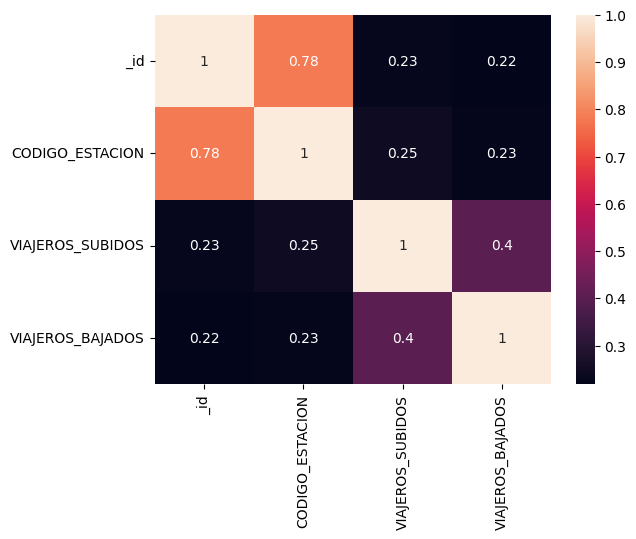

In [25]:
correlacion = sevilla_df.corr()
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns,
            annot=True)

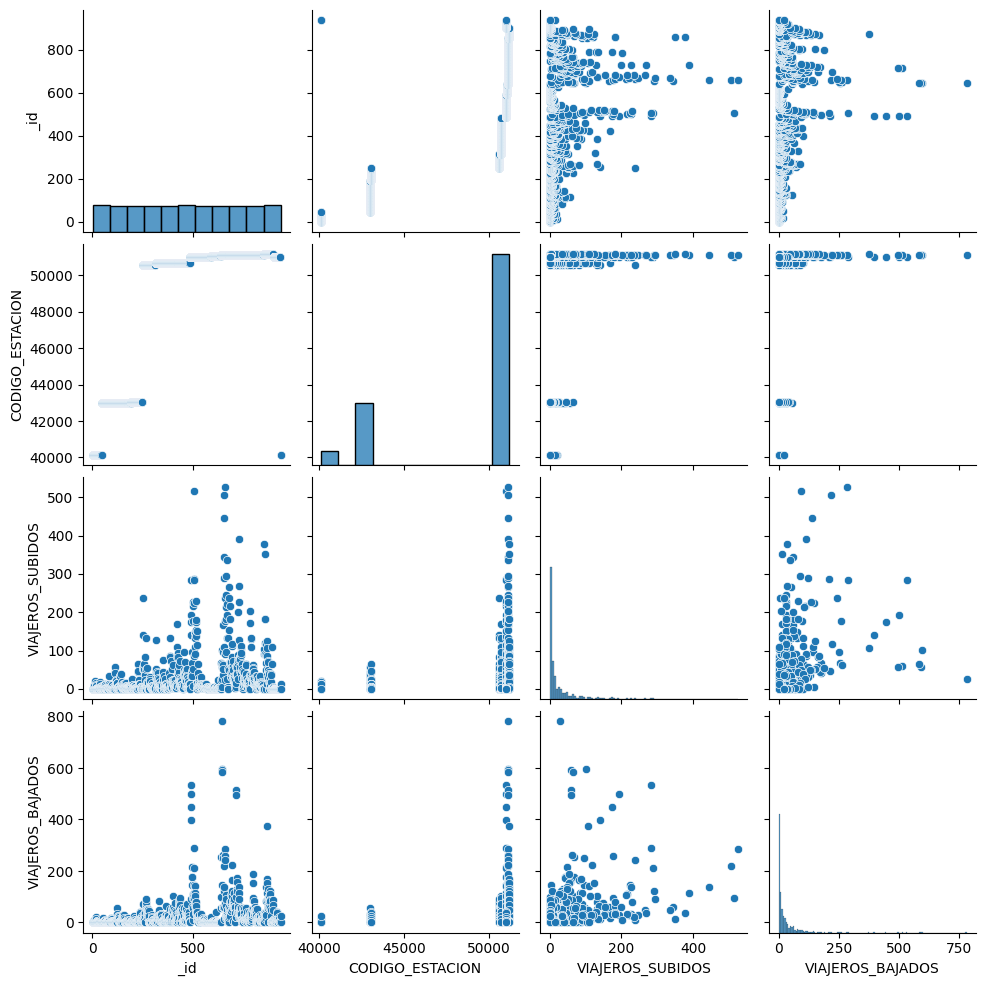

In [26]:
sns.pairplot(sevilla_df)

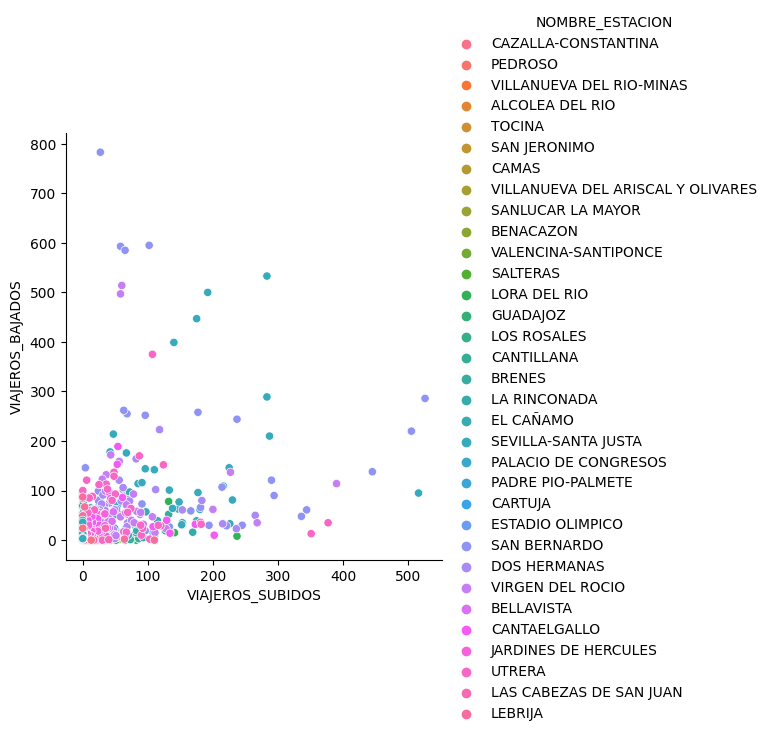

In [29]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'VIAJEROS_BAJADOS', hue = 'NOMBRE_ESTACION', data= sevilla_df)

In [ ]:
#se producen muchos viajes con trayectos entre virgen del rocio hasta lebrija con pocos viajeros
#se proudcen menos viajes o pocos viajes con muchos viajeros en la frnaka de brenes, la rinconada, el cañamo...(franja azul)

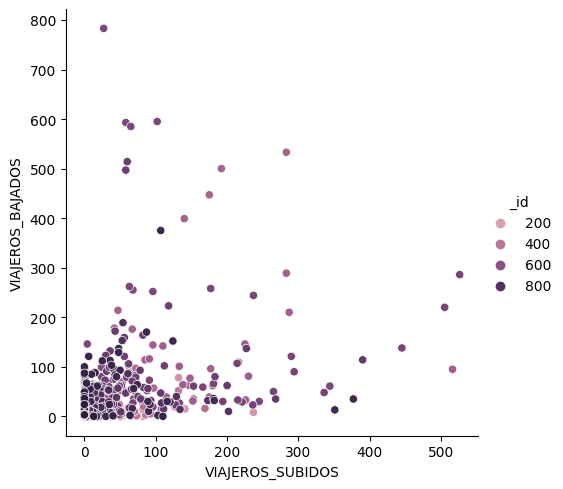

In [30]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'VIAJEROS_BAJADOS', hue = '_id', data= sevilla_df)

In [24]:
id = sevilla_df.groupby('_id')[['NOMBRE_ESTACION']].sum()

sevilla_df['_id']==600
print(sevilla_df[sevilla_df['_id']==600])
print(sevilla_df[sevilla_df['_id']==800])

     _id  CODIGO_ESTACION NOMBRE_ESTACION NUCLEO_CERCANIAS  TRAMO_HORARIO  \
600  600            51050         CARTUJA          SEVILLA  12:30 - 13:00   

     VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
600                 3                 0  
     _id  CODIGO_ESTACION NOMBRE_ESTACION NUCLEO_CERCANIAS  TRAMO_HORARIO  \
799  800            51112    CANTAELGALLO          SEVILLA  14:30 - 15:00   

     VIAJEROS_SUBIDOS  VIAJEROS_BAJADOS  
799                54               189  


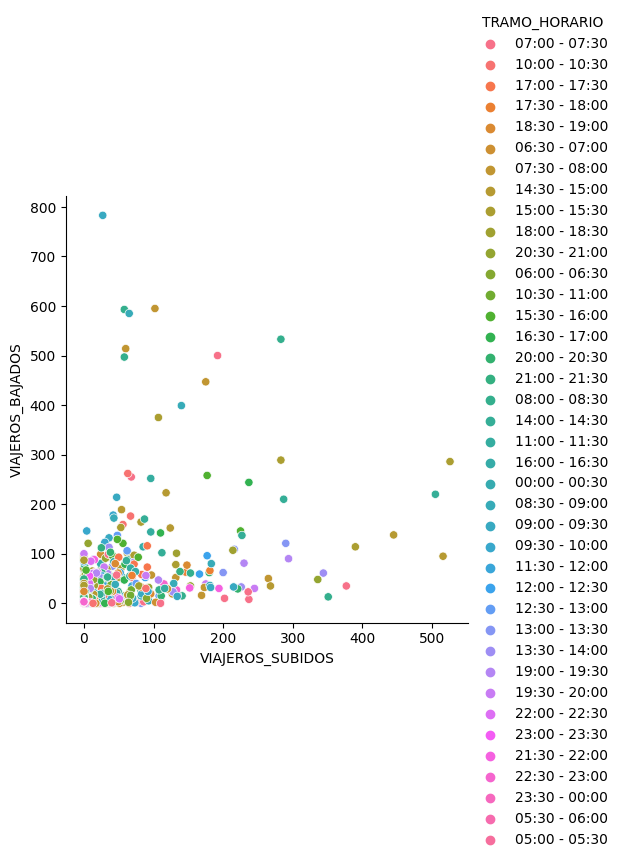

In [4]:
sns.relplot(x= 'VIAJEROS_SUBIDOS', y= 'VIAJEROS_BAJADOS', hue = 'TRAMO_HORARIO', data= sevilla_df)

## DATA SET 2

In [6]:
import json 
import urllib
import requests
import pandas as pd
import seaborn as sns

In [9]:
from itertools import groupby
import urllib
url = 'https://data.renfe.com/api/3/action/datastore_search?resource_id=e6105052-ad33-4428-b36f-77e6f06ef4a9&limit=1000'  
response = requests.get(url)
data = response.json()
renfe_df = pd.DataFrame(data['result']['records'])
renfe_df


,_id,CODIGO_ESTACION,NOMBRE_ESTACION,NUCLEO_CERCANIAS,TRAMO_HORARIO,VIAJEROS_SUBIDOS,VIAJEROS_BAJADOS
0,1,4040,ZARAGOZA DELICIAS,ZARAGOZA,06:00 - 06:30,3,0
1,2,4040,ZARAGOZA DELICIAS,ZARAGOZA,07:00 - 07:30,3,10
2,3,4040,ZARAGOZA DELICIAS,ZARAGOZA,07:30 - 08:00,4,21
3,4,4040,ZARAGOZA DELICIAS,ZARAGOZA,08:00 - 08:30,0,15
4,5,4040,ZARAGOZA DELICIAS,ZARAGOZA,08:30 - 09:00,37,19
...,...,...,...,...,...,...,...
995,964,5225,SALINAS,ASTURIAS AM,14:30 - 15:00,0,0
996,965,5225,SALINAS,ASTURIAS AM,15:00 - 15:30,2,0
997,966,5225,SALINAS,ASTURIAS AM,16:00 - 16:30,0,0
998,967,5225,SALINAS,ASTURIAS AM,17:00 - 17:30,3,1


In [19]:
renfe_df['NOMBRE_ESTACION']

0      ZARAGOZA DELICIAS
1      ZARAGOZA DELICIAS
2      ZARAGOZA DELICIAS
3      ZARAGOZA DELICIAS
4      ZARAGOZA DELICIAS
             ...        
995              SALINAS
996              SALINAS
997              SALINAS
998              SALINAS
999              SALINAS
Name: NOMBRE_ESTACION, Length: 1000, dtype: object

In [35]:
from itertools import groupby
import urllib
url = 'https://data.renfe.com/api/3/action/datastore_search?resource_id=78e2d1d6-3d12-4b8d-807c-aa0f51e7ec8b&limit=1000'  
response = requests.get(url)
data = response.json()
puntual_df = pd.DataFrame(data['result']['records'])
puntual_df


,_id,TIPO DE TREN/PRODUCTO,RETRASO,INDEMNIZACION
0,1,AVE,> 15 MINUTOS,50%
1,2,AVE,>30 MINUTOS,100%
2,3,"ALVIA, EUROMED, AV CITY",>30 MINUTOS,50%
3,4,"ALVIA, EUROMED, AV CITY",>60 MINUTOS,100%
4,5,"TALGO, ALTARIA, INTERCITY (LD), TRENHOTEL",>=60 MINUTOS,50%
5,6,"TALGO, ALTARIA, INTERCITY (LD), TRENHOTEL",>90 MINUTOS,100%
6,7,MEDIA DISTANCIA,>15 MINTOS,25%
7,8,MEDIA DISTANCIA,>30 MINUTOS,50%
8,9,MEDIA DISTANCIA,>60 MINUTOS,100%
9,10,REGIONAL EXPRES Y REGIONAL,> 30 MINUTOS,25%
